In [8]:
import deeplake

ds_train = deeplake.load("hub://activeloop/pacs-train")
ds_val = deeplake.load("hub://activeloop/pacs-val")
ds_test = deeplake.load("hub://activeloop/pacs-test")

/

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/pacs-train



|

hub://activeloop/pacs-train loaded successfully.



Opening dataset in read-only mode as you don't have write permissions.


|

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/pacs-val



/

hub://activeloop/pacs-val loaded successfully.



Opening dataset in read-only mode as you don't have write permissions.


/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/pacs-test



\

hub://activeloop/pacs-test loaded successfully.



In [1]:
from utils.initialization_utils import load_pacs, load_pickle_files

filenames = ['photo_train.pkl', 'photo_val.pkl', 'photo_test.pkl', 'art_train.pkl', 'art_val.pkl', 
                    'art_test.pkl', 'cartoon_train.pkl', 'cartoon_val.pkl', 'cartoon_test.pkl', 'sketch_train.pkl', 'sketch_val.pkl', 'sketch_test.pkl']
photo_train, photo_val, photo_test, art_train, art_val, art_test, cartoon_train, cartoon_val, cartoon_test, sketch_train, sketch_val, sketch_test = load_pickle_files('./PACS/', filenames)


photo_train_indices = photo_train.indices
photo_val_indices = photo_val.indices
photo_test_indices = photo_test.indices
art_train_indices = art_train.indices
art_val_indices = art_val.indices
art_test_indices = art_test.indices
cartoon_train_indices = cartoon_train.indices
cartoon_val_indices = cartoon_val.indices
cartoon_test_indices = cartoon_test.indices
sketch_train_indices = sketch_train.indices
sketch_val_indices = sketch_val.indices
sketch_test_indices = sketch_test.indices


In [2]:
import torch
import torchvision
from torchvision import transforms

path = '/home/master24/decentralized_deep_learning/Homework3-PACS/PACS/'
DIR_PHOTO = path+'photo'
DIR_ART = path+'art_painting'
DIR_CARTOON = path+'cartoon'
DIR_SKETCH = path+'sketch'
means, stds = (0.485, 0.456, 0.406), (0.229, 0.224, 0.225)
transf = transforms.Compose([ 
                            #transforms.Resize((224,224)),  # Crops a central square patch of the image 224 because torchvision's AlexNet needs a 224x224 input!
                            transforms.ToTensor(), # Turn PIL Image to torch.Tensor
                            transforms.Normalize(means,stds) # Normalizes tensor with mean and standard deviation
                            ])
photo_dataset = torchvision.datasets.ImageFolder(DIR_PHOTO, transform=transf)
art_dataset = torchvision.datasets.ImageFolder(DIR_ART, transform=transf)
cartoon_dataset = torchvision.datasets.ImageFolder(DIR_CARTOON, transform=transf)
sketch_dataset = torchvision.datasets.ImageFolder(DIR_SKETCH, transform=transf)

In [14]:
subset = torch.utils.data.Subset(sketch_dataset, sketch_test_indices)
# save subset as a pickle file to PACS folder, with name photo_train.pkl
import pickle
with open('PACS/sketch_test.pkl', 'wb') as f:
    pickle.dump(subset, f)

In [23]:
val_sets[0].indices

[956,
 1146,
 581,
 1262,
 763,
 1476,
 451,
 228,
 416,
 813,
 6,
 444,
 435,
 1411,
 83,
 819,
 1312,
 183,
 1478,
 10,
 817,
 632,
 1391,
 1104,
 1499,
 1080,
 1550,
 413,
 414,
 770,
 1660,
 1441,
 1269,
 1185,
 895,
 116,
 1303,
 1664,
 1101,
 289,
 543,
 1653,
 1606,
 944,
 560,
 833,
 985,
 54,
 1287,
 197,
 1495,
 1456,
 1256,
 1520,
 923,
 1492,
 1611,
 1173,
 160,
 459,
 490,
 841,
 830,
 281,
 952,
 818,
 810,
 750,
 400,
 1353,
 1197,
 559,
 1236,
 801,
 349,
 1027,
 815,
 1400,
 982,
 954,
 1231,
 1615,
 1180,
 1261,
 1021,
 1594,
 645,
 1528,
 1398,
 273,
 1453,
 1657,
 1358,
 27,
 1663,
 1512,
 30,
 1432,
 920,
 1128,
 655,
 513,
 1202,
 213,
 894,
 1352,
 1412,
 333,
 1067,
 1314,
 1186,
 253,
 574,
 605,
 1493,
 1362,
 644,
 404,
 1388,
 151,
 1648,
 361,
 1582,
 622,
 878,
 1521,
 1142,
 550,
 1049,
 1364,
 206,
 1181,
 98,
 385,
 57,
 564,
 961,
 1010,
 203,
 509,
 299,
 672,
 243,
 492,
 480,
 521,
 937,
 970,
 1337,
 1252,
 1295,
 1031,
 1127,
 567,
 829,
 616,
 45

In [11]:
client1_data = client_train_datasets[0]

In [16]:
client1_data.dataset.dataset.root = '/home/master24/decentralized_deep_learning/Homework3-PACS/PACS/photo'

In [18]:
client1_data.dataset.dataset.root

'/home/master24/decentralized_deep_learning/Homework3-PACS/PACS/photo'

In [10]:
#iterate over client1_data pytorch subset dataset
for i in range(len(client1_data)):
    print(client1_data[i])

FileNotFoundError: [Errno 2] No such file or directory: '/home/edvinli/Documents/Git/Homework3-PACS/PACS/photo/elephant/064_0007.jpg'

In [7]:
#print images from client1_data
import matplotlib.pyplot as plt
plt.imshow(client1_data['image'])
plt.show()

TypeError: list indices must be integers or slices, not str

In [25]:
import pickle
import os
import sys

# include parent directory in path
parent_dir = os.path.abspath('../..')
sys.path.append(parent_dir)

if os.path.exists('save/cosine_sanity_check/cosines.pkl'):
    with open('save/cosine_sanity_check/cosines.pkl', 'rb') as file:
        cosines = pickle.load(file)
else:
    print('No clients found')

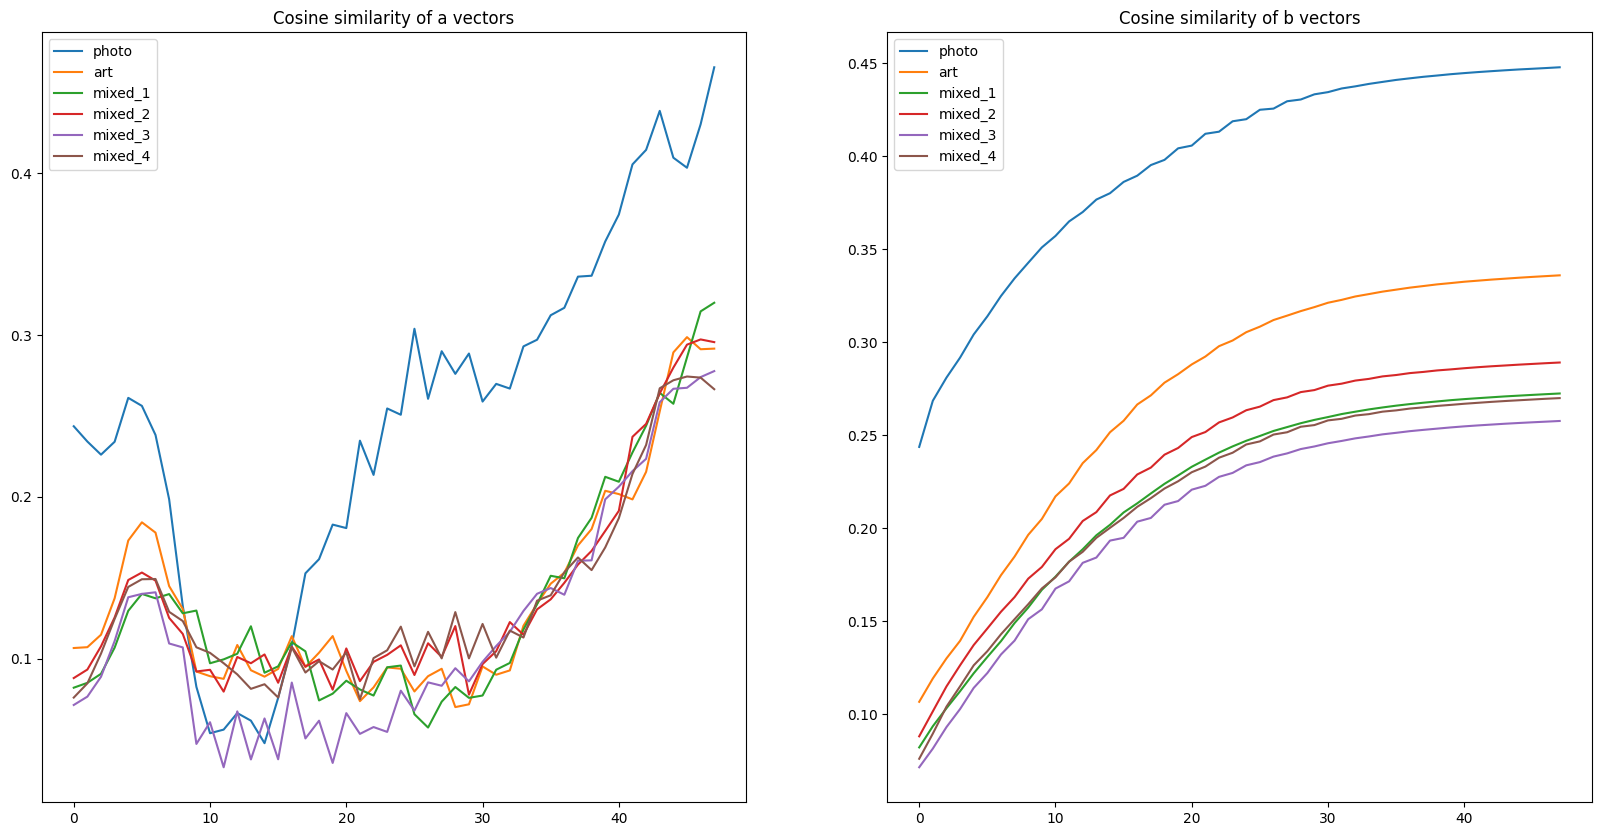

In [26]:
photo_a, photo_b, sketch_a, sketch_b, mixed_1_a, mixed_1_b, mixed_2_a, mixed_2_b, mixed_3_a, mixed_3_b, mixed_4_a, mixed_4_b = cosines

# plot all vectors ending with a in one plot, and all vectors ending with b in another plot, as line plots
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].plot(photo_a, label='photo')
ax[0].plot(sketch_a, label='art')
ax[0].plot(mixed_1_a, label='mixed_1')
ax[0].plot(mixed_2_a, label='mixed_2')
ax[0].plot(mixed_3_a, label='mixed_3')
ax[0].plot(mixed_4_a, label='mixed_4')
ax[0].set_title('Cosine similarity of a vectors')
ax[0].legend()
ax[1].plot(photo_b, label='photo')
ax[1].plot(sketch_b, label='art')
ax[1].plot(mixed_1_b, label='mixed_1')
ax[1].plot(mixed_2_b, label='mixed_2')
ax[1].plot(mixed_3_b, label='mixed_3')
ax[1].plot(mixed_4_b, label='mixed_4')
ax[1].set_title('Cosine similarity of b vectors')
ax[1].legend()
plt.show()



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


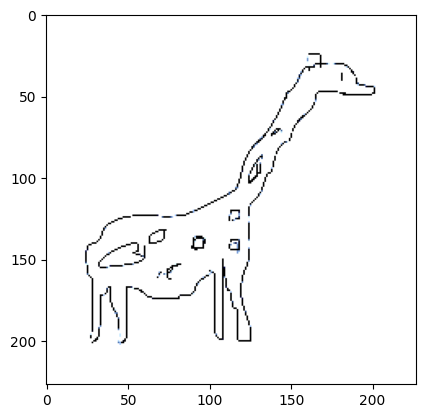

In [16]:

# print the first image of photo_train.pkl
import pickle
import os
import sys

with open('PACS/sketch_train.pkl', 'rb') as f:
    sketch_train = pickle.load(f)

import matplotlib.pyplot as plt
plt.imshow(sketch_train[0][0].permute(1, 2, 0))
plt.show()


In [2]:
import numpy as np

sims = np.array([1, 1, 1, 1., 1, 1, 9.9999e5, 1, 1, 1e6], dtype=np.float32)
priors = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=np.float32)

# Extract non-zero similarity scores
non_zero_indices = [j for j, score in enumerate(sims) if score > 0]
non_zero_scores = [sims[j] for j in non_zero_indices]

print(non_zero_indices)

# Apply the softmax transformation to non-zero entries
if non_zero_scores:  # Check if there are any non-zero scores
    max_score = max(non_zero_scores)
    exp_scores = np.exp(np.array(non_zero_scores - max_score) * 30)
    print(exp_scores)
    
    # Normalize
    sum_exp_scores = np.sum(exp_scores)
    print(sum_exp_scores)
    for j, score in zip(non_zero_indices, exp_scores):
        print(score / sum_exp_scores)
        priors[j] = score / sum_exp_scores

print(priors)



priors = priors + 1e-6
priors = priors / np.sum(priors)

print(priors)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[9.9999011e-07 9.9999011e-07 9.9999011e-07 9.9999011e-07 9.9999011e-07
 9.9999011e-07 9.9999011e-07 9.9999011e-07 9.9999011e-07 9.9999106e-01]


In [3]:
# import bigpacs.csv into pandas dataframe
import pandas as pd

df = pd.read_csv('bigpacs.csv')
df.head()


,Run_Type,Photo_average_accuracy,Photo_stddev,Art_average_accuracy,Art_stddev,Cartoon_average_accuracy,Cartoon_stddev,Sketch_average_accuracy,Sketch_stddev
0,Random,33.070000,55.546869,29.163333,49.648867,30.410000,51.808052,29.990000,50.222110
1,Local_no_comm,31.690000,53.156639,26.383333,44.834037,28.160000,47.911134,27.700000,46.256567
2,Oracle,33.176667,55.731621,29.910000,50.942068,31.760000,54.146217,30.583333,51.249593
3,DACINV,65.566667,55.916502,59.230000,50.431713,62.006667,52.834914,59.090000,49.446416
4,DACCOSB,97.356667,0.427707,86.610000,1.070561,91.166667,0.535755,87.273333,1.288772


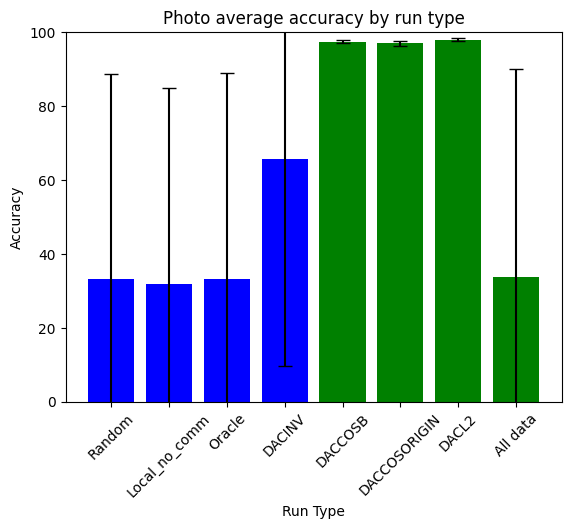

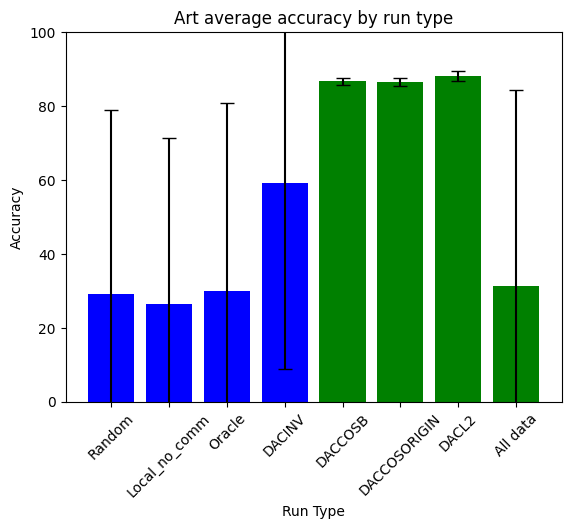

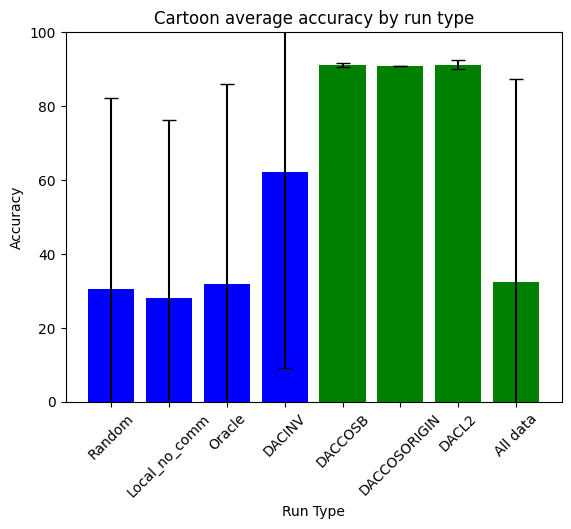

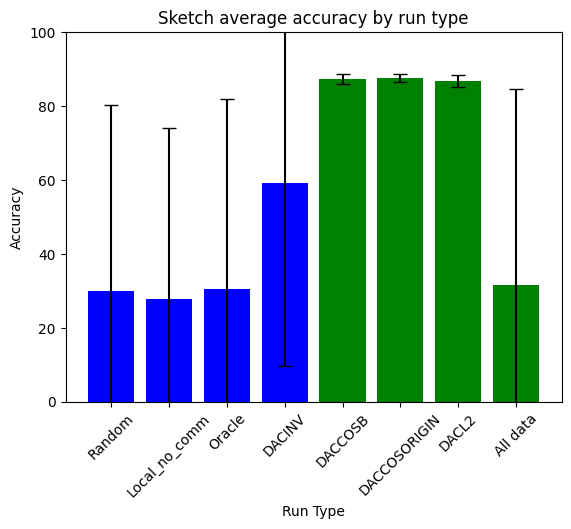

In [4]:
def plot_average_accuracy(dataframe, category):
    import matplotlib.pyplot as plt
    
    run_types = dataframe['Run_Type'].unique()
    colors = ['blue'] * 4 + ['green'] * 4  # Set all bars to the same color
    plt.ylim(0, 100)  # Set y-axis range

    for i, run_type in enumerate(run_types):
        run_type_df = dataframe[dataframe['Run_Type'] == run_type]
        avg = run_type_df[f'{category}_average_accuracy']
        std = run_type_df[f'{category}_stddev']
        plt.bar(run_type, avg, yerr=std, capsize=5, color=colors[i])  # Set color for each bar
    plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

    # add title
    plt.title(f'{category} average accuracy by run type')
    # set y axis to accuracy
    plt.ylabel('Accuracy')
    # set x axis to run type
    plt.xlabel('Run Type')

    plt.show()

plot_average_accuracy(df, 'Photo')
plot_average_accuracy(df, 'Art')
plot_average_accuracy(df, 'Cartoon')
plot_average_accuracy(df, 'Sketch')



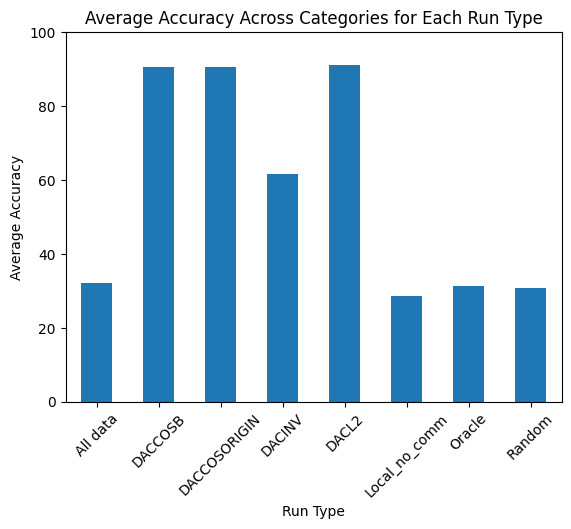

In [13]:
# Group the dataframe by run type and calculate the average accuracy for each category
grouped_df = df.groupby('Run_Type').mean()[['Photo_average_accuracy', 'Art_average_accuracy', 'Sketch_average_accuracy', 'Cartoon_average_accuracy']]

# Calculate the average across categories for each run type
grouped_df['Average'] = grouped_df.mean(axis=1)

# Plot the bar chart
grouped_df['Average'].plot(kind='bar', rot=45)

# Add labels and title
plt.xlabel('Run Type')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy Across Categories for Each Run Type')

# set the y axis range to 0-100
plt.ylim(0, 100)

# Show the plot
plt.show()
